In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('zillow_data.csv.zip')

In [6]:
#here we are filtering out our zipcodes to just look at the top 500 in sizerank
df['Top500'] = df['SizeRank'].apply(lambda x: True if x <= 500 else False)

df = df.loc[df.Top500, :]

In [7]:
#creating growth rate metric and sorting to see top zips
df['GrowthRate'] = df['2018-04'] / df['1996-04'] - 1
df.sort_values('GrowthRate', ascending = False)[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Top500,GrowthRate
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,True,11.189940
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,True,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,True,9.403061
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,True,8.941958
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,771200,773300,777600,780500,781600,785500,791400,793300,True,7.622826
70,62032,11221,New York,NY,New York,Kings,71,133700.0,133700.0,133700.0,...,965300,984700,995000,998100,1000900,1015400,1037300,1048700,True,6.843680
76,97565,94110,San Francisco,CA,San Francisco,San Francisco,77,213900.0,214800.0,216000.0,...,1513500,1525200,1533600,1536500,1536200,1544400,1570000,1594000,True,6.452080
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,672200,673100,674600,678200,680900,683000,687500,691300,True,6.330859
107,96007,90026,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,108,138100.0,138300.0,138300.0,...,907700,919900,932600,947300,962600,973700,975200,972100,True,6.039102
260,62029,11218,New York,NY,New York,Kings,261,177200.0,177000.0,176800.0,...,1199700,1201800,1198000,1186400,1174500,1173900,1196100,1220900,True,5.889955


In [8]:
#checking which metros have the most top500 sizerank zipcodes
df.value_counts('Metro')[:10]

Metro
New York                          46
Los Angeles-Long Beach-Anaheim    32
Chicago                           27
Atlanta                           23
Miami-Fort Lauderdale             20
Houston                           20
Dallas-Fort Worth                 19
Washington                        14
San Francisco                     14
Charlotte                         11
dtype: int64

In [9]:
#showing that almost half of zip codes in our top 500 are represented in the top 10 metros
df.value_counts('Metro')[:10].sum()

226

In [10]:
#making dfs for our potential Metros and checking mean growthrate
#going to use NYC, Chi, LA, MIA, and DFW highest growth rates with atleast 20 zipcodes
df_nyc = df[df['Metro'] == 'New York']
df_chi = df[df['Metro'] == 'Chicago']
df_hou = df[df['Metro'] == 'Houston']
df_la = df[df['Metro'] == 'Los Angeles-Long Beach-Anaheim']
df_dfw = df[df['Metro'] == 'Dallas-Fort Worth']
df_atl = df[df['Metro'] == 'Atlanta']
df_mia = df[df['Metro'] == 'Miami-Fort Lauderdale']
df_dc = df[df['Metro'] == 'Washington']
df_sf = df[df['Metro'] == 'San Francisco']
df_cha = df[df['Metro'] == 'Charlotte']

In [11]:
df_nyc['GrowthRate'].mean()

3.7712542878046262

In [12]:
df_la['GrowthRate'].mean()

3.2231950761389916

In [13]:
df_chi['GrowthRate'].mean()

1.3872262487454181

In [14]:
df_mia['GrowthRate'].mean()

1.9554887689343101

In [15]:
df_dfw['GrowthRate'].mean()

0.9493054726931407

In [16]:
df_atl['GrowthRate'].mean()

0.8519873970692066

In [17]:
df_hou['GrowthRate'].mean()

0.6894731410422865

In [18]:
df_dc['GrowthRate'].mean()

2.9030905800676967

In [19]:
df_sf['GrowthRate'].mean()

3.3617040219529897

In [20]:
df_cha['GrowthRate'].mean()

1.0371098444006648

In [21]:
# flatiron provided function
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    
    return pd.to_datetime(df.columns.values[7:272], format='%Y-%m')

In [22]:
get_datetimes(df_nyc)
get_datetimes(df_la)
get_datetimes(df_mia)
get_datetimes(df_dfw)
get_datetimes(df_chi)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [23]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Top500', 'GrowthRate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [24]:
df_nyc = melt_data(df_nyc)
df_la = melt_data(df_la)
df_dfw = melt_data(df_dfw)
df_mia = melt_data(df_mia)
df_chi = melt_data(df_chi)


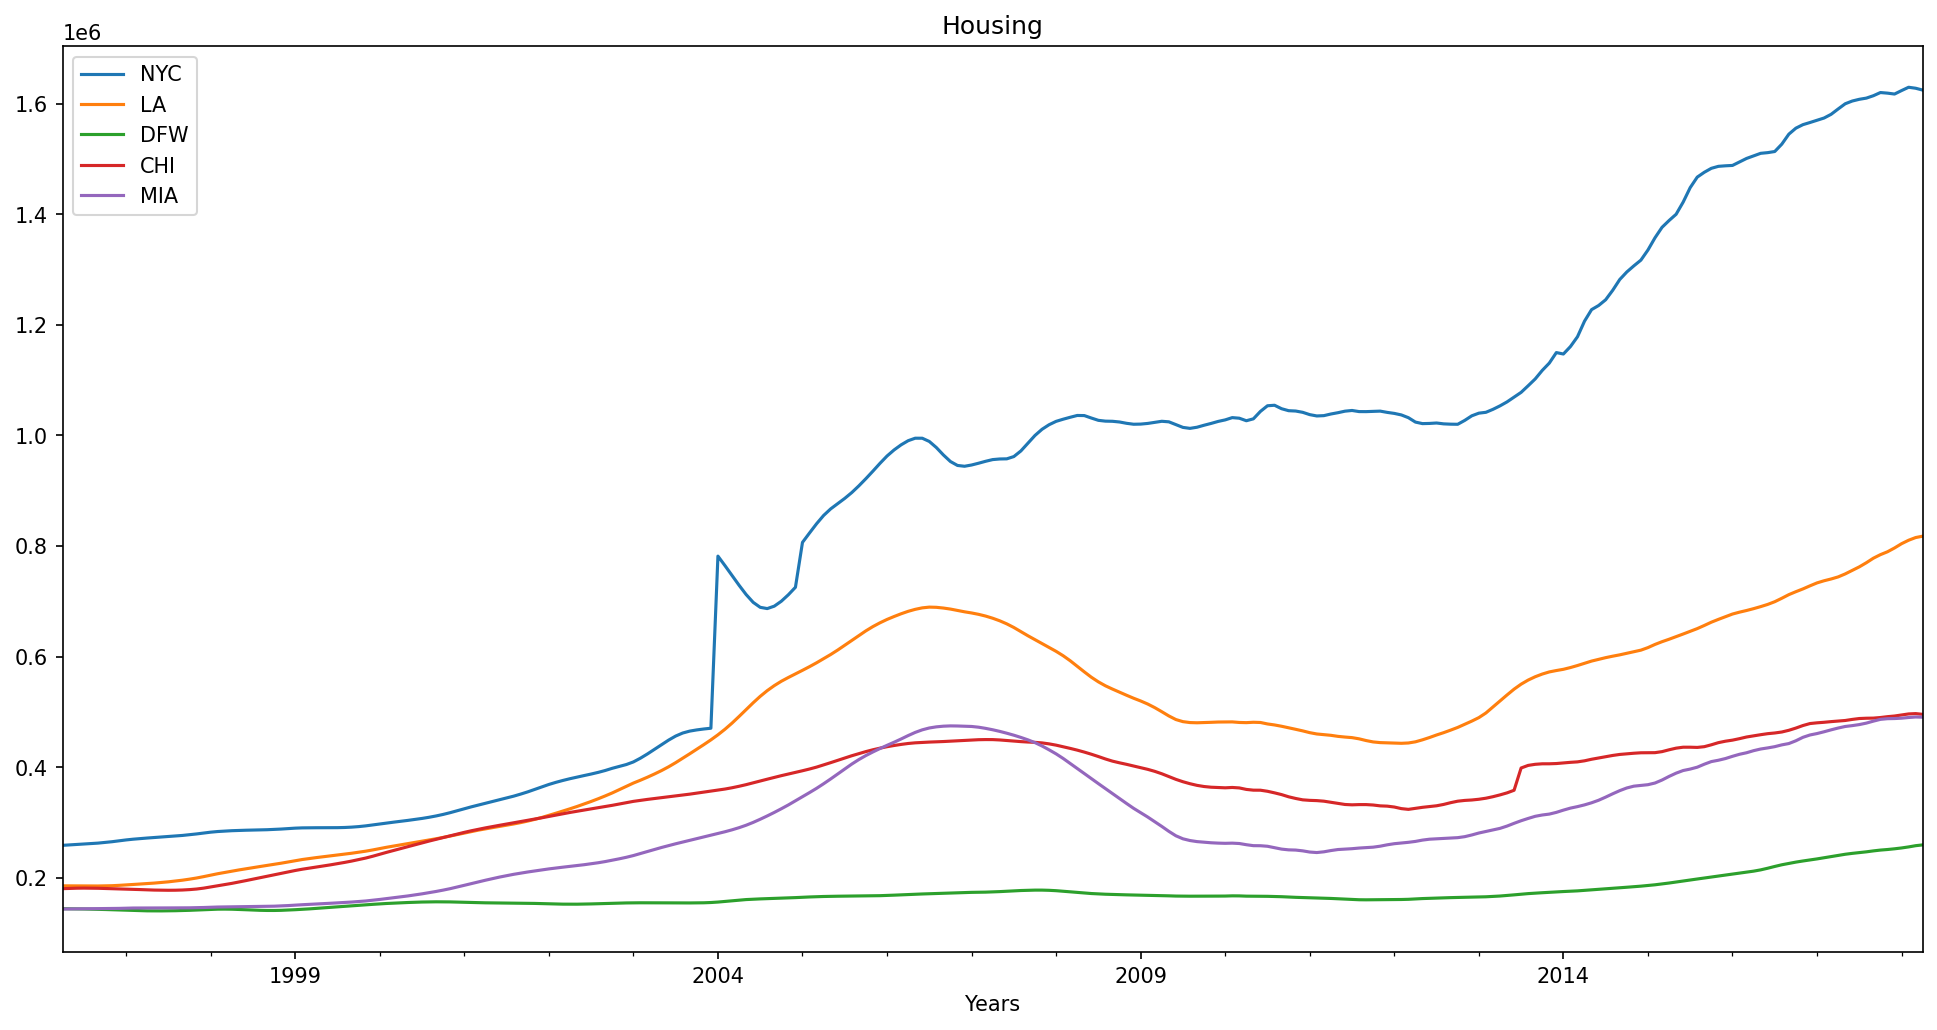

In [30]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df_nyc['value'].plot(label='NYC')
df_la['value'].plot(label='LA')
df_dfw['value'].plot(label='DFW')
df_chi['value'].plot(label='CHI')
df_mia['value'].plot(label='MIA')
# adding title to the plot
plt.title('Housing')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend();

## sarah stuff here for stationarity 

In [25]:
def stationarity_check(df):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(df, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# NYC 

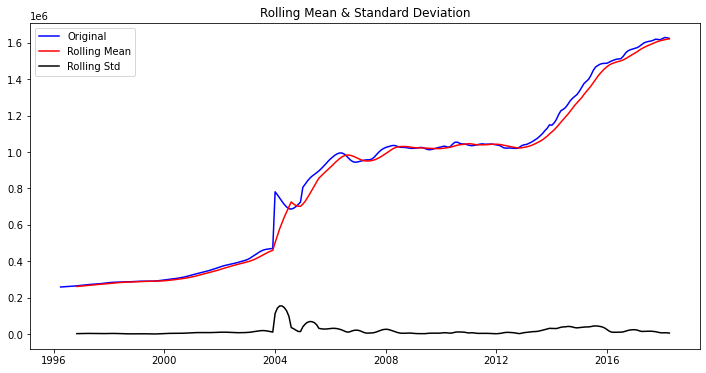

Results of Dickey-Fuller Test: 

Test Statistic                   0.531359
p-value                          0.985796
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [27]:
stationarity_check(df_nyc)
# not stationary, let's try  a log transformation below

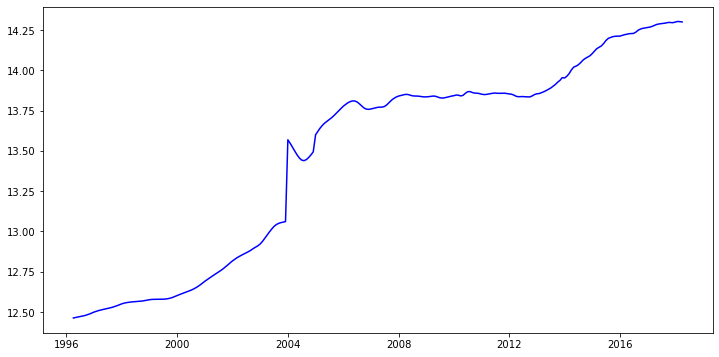

In [35]:
df_log_nyc = np.log(df_nyc)
fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color='blue');

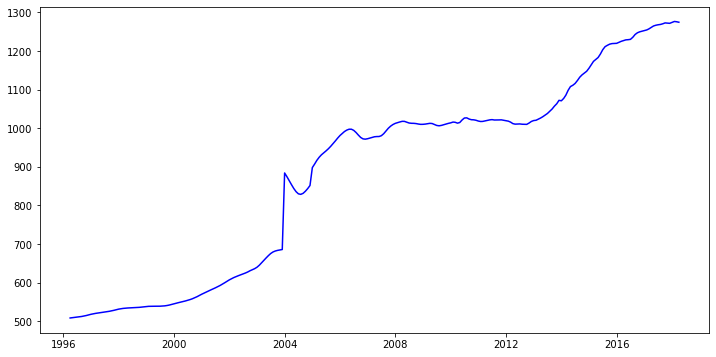

In [36]:
# let's try a sqrt transformation 
df_sqrt_nyc = np.sqrt(df_nyc)
fig = plt.figure(figsize=(12,6))
plt.plot(df_sqrt, color='blue');

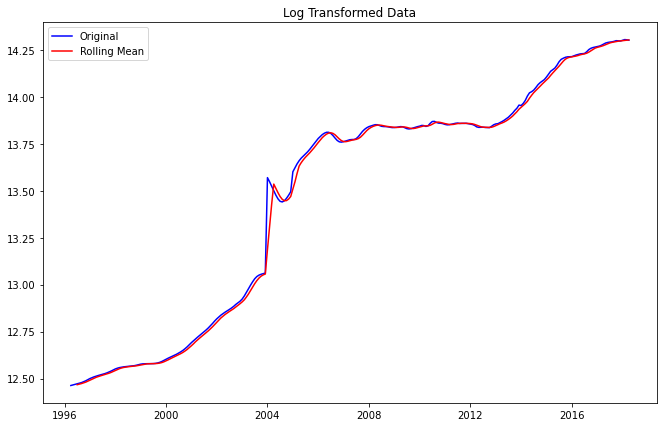

In [37]:
# lets create a log transform so we can substract the rolling mean 
roll_mean_nyc = np.log(df_nyc).rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(df_nyc), color='blue', label='Original')
plt.plot(roll_mean_nyc, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [39]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean_nyc = np.log(df_nyc) - roll_mean

# Print the first 10 rows
data_minus_roll_mean_nyc.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,0.004207
1996-08-01,0.004446
1996-09-01,0.005016
1996-10-01,0.005963
1996-11-01,0.007034
1996-12-01,0.008287


In [40]:
data_minus_roll_mean_nyc.dropna(inplace=True)

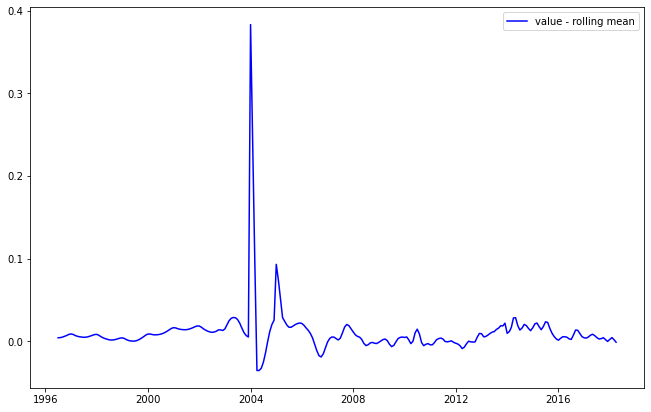

In [41]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean_nyc, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

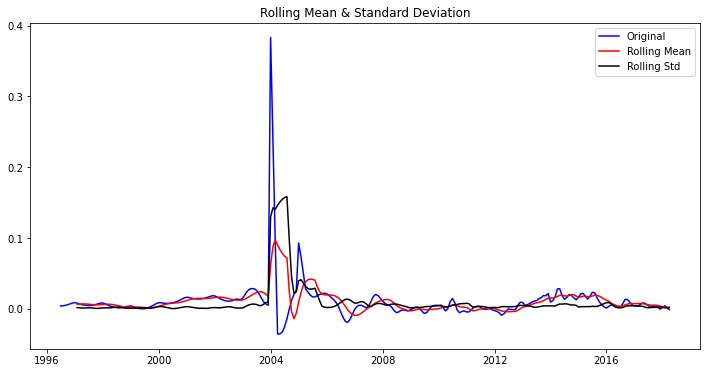

Results of Dickey-Fuller Test: 

Test Statistic                -8.699461e+00
p-value                        3.844340e-14
#Lags Used                     2.000000e+00
Number of Observations Used    2.590000e+02
Critical Value (1%)           -3.455853e+00
Critical Value (5%)           -2.872765e+00
Critical Value (10%)          -2.572752e+00
dtype: float64


In [42]:
stationarity_check(data_minus_roll_mean_nyc)

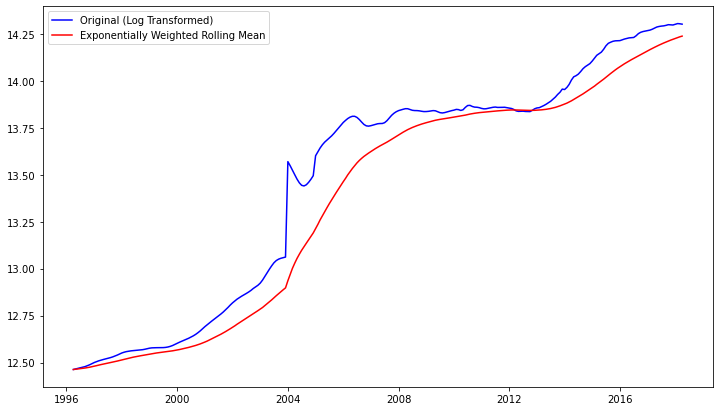

In [43]:
#seems that ur p-value from above is worse than it was originally, so let's  subtract  thr weighted rolling mean 
# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean_nyc = np.log(df_nyc).ewm(halflife=12).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_nyc), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean_nyc, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

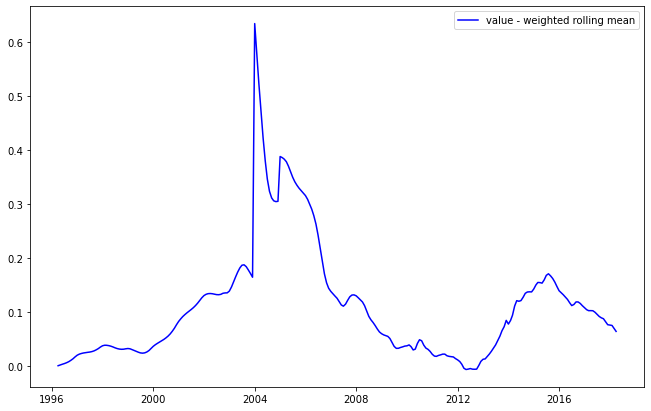

In [44]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean_nyc = np.log(df_nyc) - exp_roll_mean_nyc

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean_nyc, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

#  best for nyc (i think) 

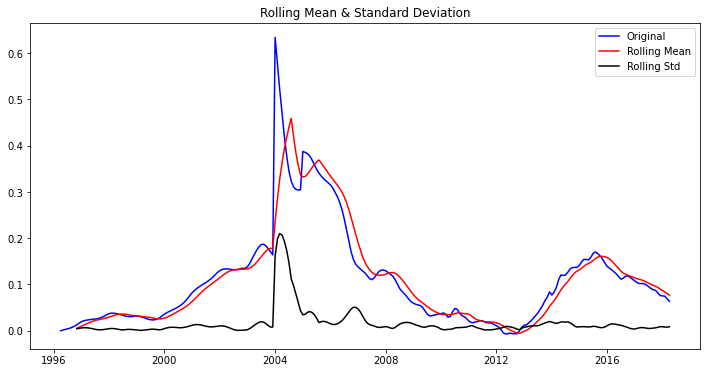

Results of Dickey-Fuller Test: 

Test Statistic                  -2.418963
p-value                          0.136456
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [46]:
stationarity_check(data_minus_exp_roll_mean_nyc)
#p-value is getting better, but not quite there

In [47]:
# let's difference it and see if that helps 
data_diff_nyc = data_minus_exp_roll_mean_nyc.diff(periods=12)

# Drop the missing values
data_diff_nyc.dropna(inplace=True)

# Check out the first few rows
data_diff_nyc.head(15)

,value
time,
1997-04-01,0.023587
1997-05-01,0.022865
1997-06-01,0.022063
1997-07-01,0.021328
1997-08-01,0.020632
1997-09-01,0.020065
1997-10-01,0.019499
1997-11-01,0.018925
1997-12-01,0.018285


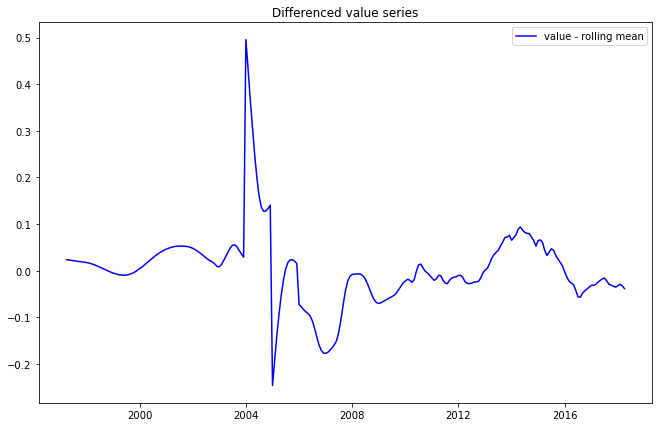

In [48]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff_nyc, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.title('Differenced value series')
plt.show(block=False)

# ask  clay for his thoughts here ...

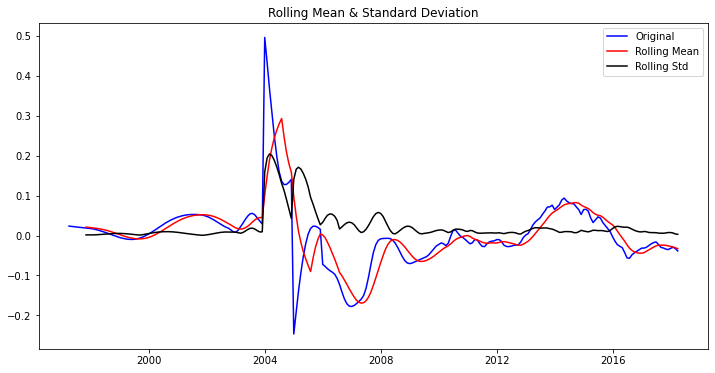

Results of Dickey-Fuller Test: 

Test Statistic                  -2.564504
p-value                          0.100558
#Lags Used                      12.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64


In [50]:
stationarity_check(data_diff_nyc)
#our p-value is gettting closer!

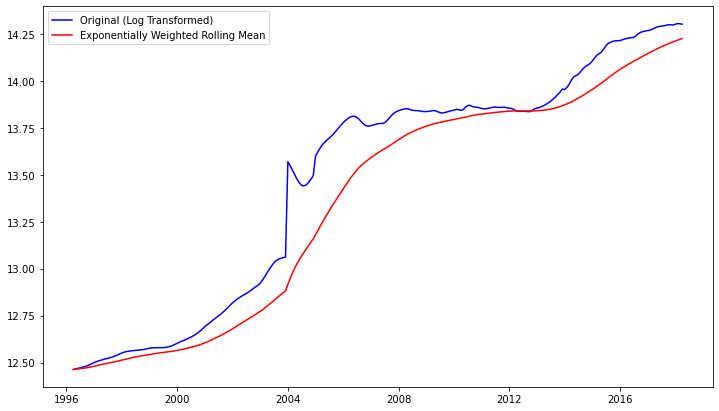

In [68]:
# lets try going back to exponetial rolling mean --> lets play with the halflife 

# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean_nyc = np.log(df_nyc).ewm(alpha = .05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_nyc), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean_nyc, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

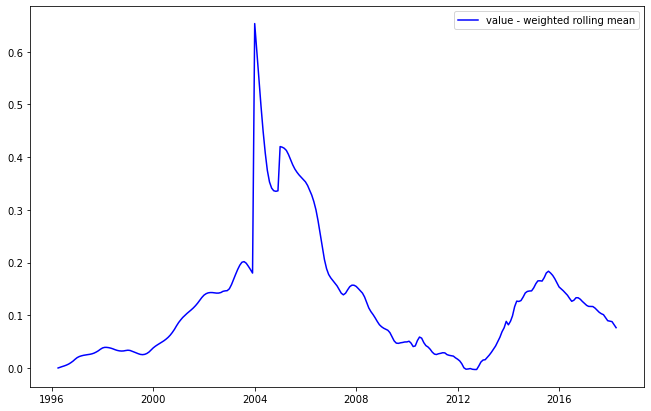

In [69]:
# back to exponetial rolling mean 
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean_nyc = np.log(df_nyc) - exp_roll_mean_nyc

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean_nyc, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

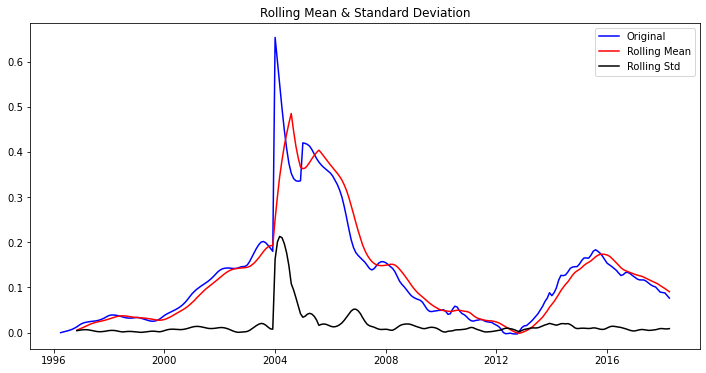

Results of Dickey-Fuller Test: 

Test Statistic                  -2.280054
p-value                          0.178482
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [70]:
stationarity_check(data_minus_exp_roll_mean_nyc)

# LA

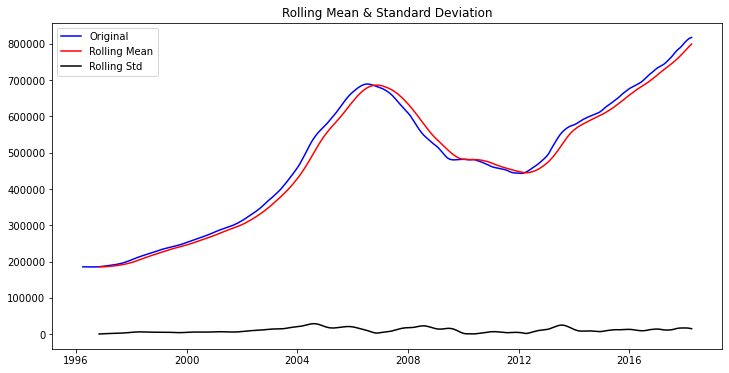

Results of Dickey-Fuller Test: 

Test Statistic                  -1.590106
p-value                          0.488562
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [51]:
stationarity_check(df_la)
# data is not stationary yet, need to get that p-value down 

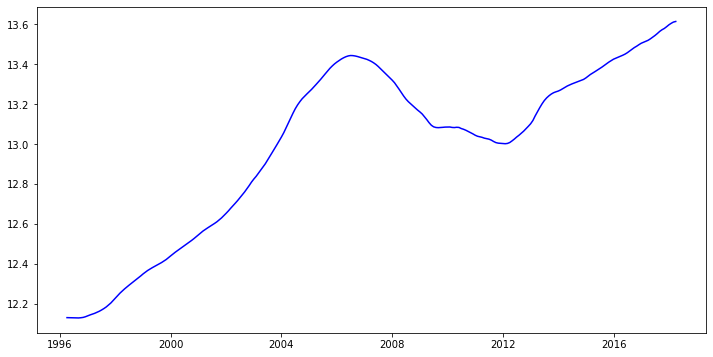

In [53]:
# let's do a log transformation 
df_log_la = np.log(df_la)
fig = plt.figure(figsize=(12,6))
plt.plot(df_log_la, color='blue');

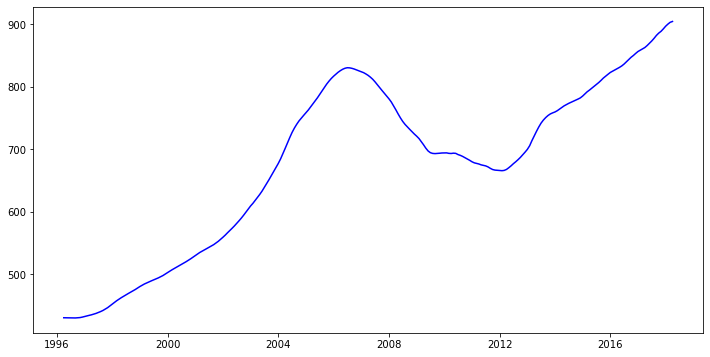

In [54]:
# lets try a sqrt transform 
df_sqrt_la = np.sqrt(df_la)
fig = plt.figure(figsize=(12,6))
plt.plot(df_sqrt_la, color='blue');

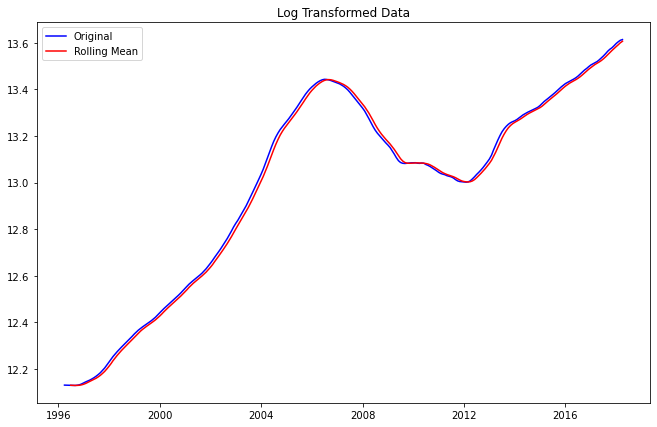

In [55]:
# lets create a log transform so we can substract the rolling mean 
roll_mean_la = np.log(df_la).rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(df_la), color='blue', label='Original')
plt.plot(roll_mean_la, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [56]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean_la = np.log(df_la) - roll_mean_la

# Print the first 10 rows
data_minus_roll_mean_la.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,-0.000764
1996-08-01,-0.000578
1996-09-01,-0.000122
1996-10-01,0.000810
1996-11-01,0.001830
1996-12-01,0.003652


In [57]:
data_minus_roll_mean_la.dropna(inplace=True)

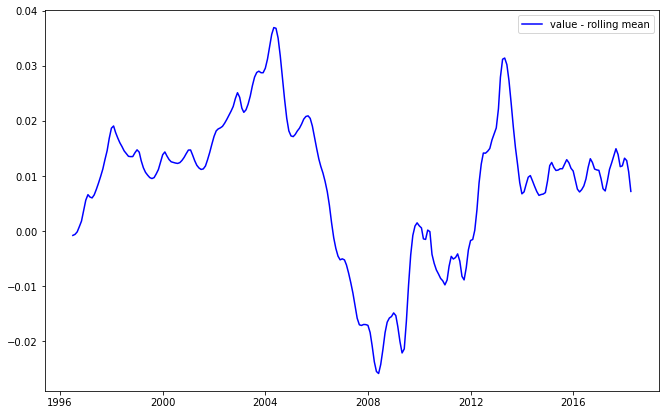

In [58]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean_la, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

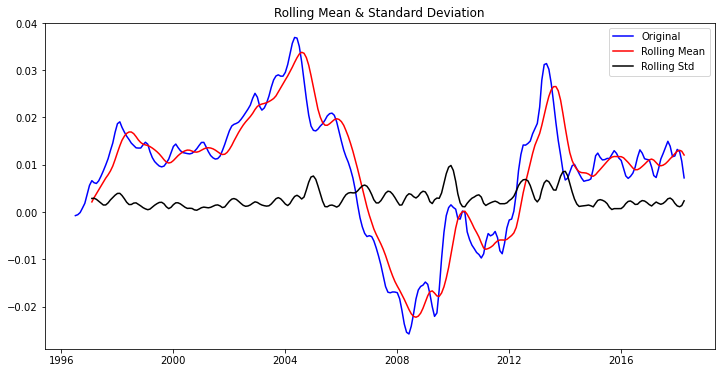

Results of Dickey-Fuller Test: 

Test Statistic                  -2.093048
p-value                          0.247319
#Lags Used                      15.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [59]:
stationarity_check(data_minus_roll_mean_la)
#p-value is getting better

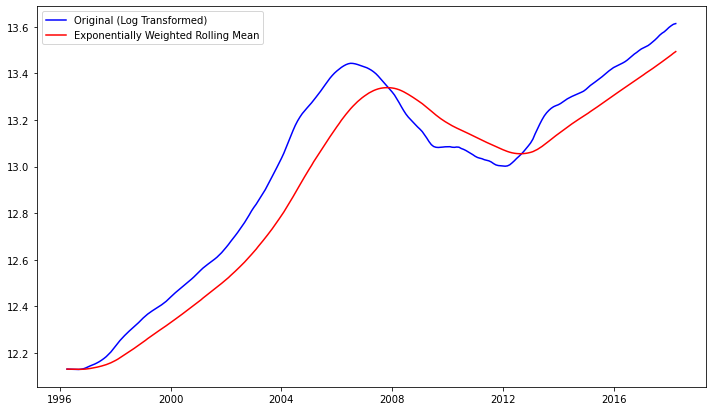

In [60]:
# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean_la = np.log(df_la).ewm(halflife=12).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_la), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean_la, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

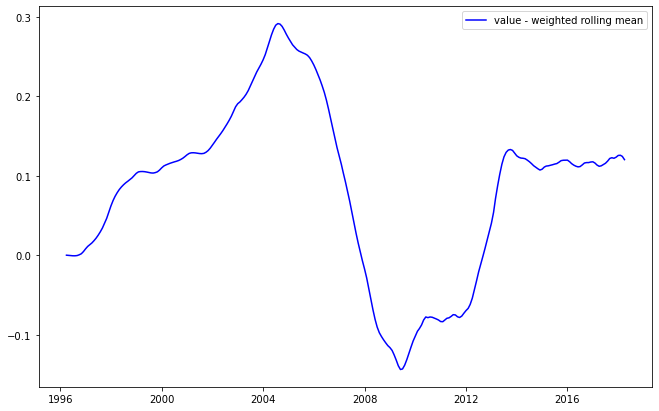

In [61]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean_la = np.log(df_la) - exp_roll_mean_la

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean_la, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

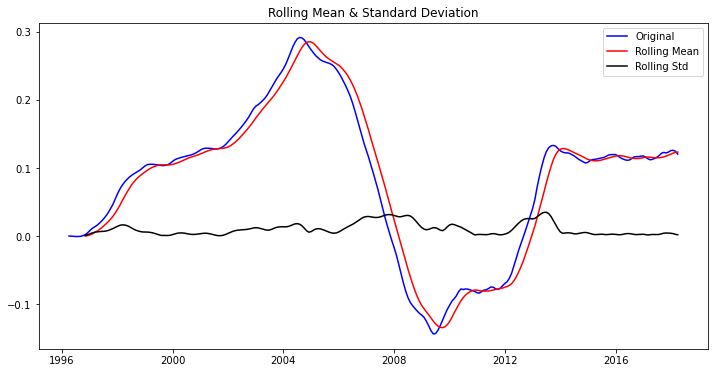

Results of Dickey-Fuller Test: 

Test Statistic                  -2.527419
p-value                          0.108945
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [63]:
stationarity_check(data_minus_exp_roll_mean_la)
#p-value is getting better!

In [64]:
#lets try our hand at differencing 
data_diff_la = data_minus_exp_roll_mean_la.diff(periods=12)

# Drop the missing values
data_diff_la.dropna(inplace=True)

# Check out the first few rows
data_diff_la.head(15)

,value
time,
1997-04-01,0.015346
1997-05-01,0.018324
1997-06-01,0.021878
1997-07-01,0.025853
1997-08-01,0.030184
1997-09-01,0.034779
1997-10-01,0.039622
1997-11-01,0.044551
1997-12-01,0.049536


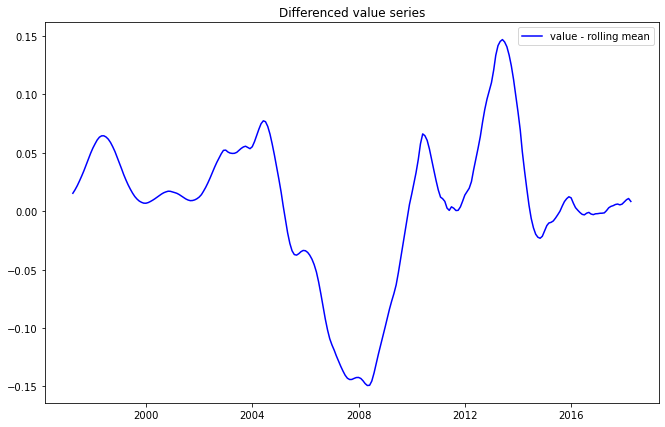

In [65]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff_la, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.title('Differenced value series')
plt.show(block=False)

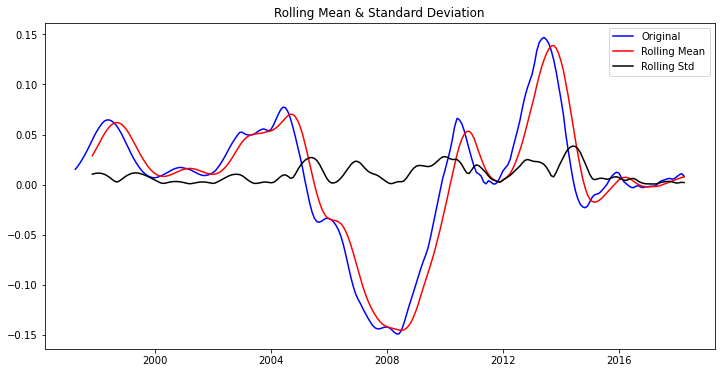

Results of Dickey-Fuller Test: 

Test Statistic                  -2.474456
p-value                          0.121814
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [67]:
stationarity_check(data_diff_la)
# we see that data_minus_exp_roll_mean_la had a better p-value, but still not at our critical value

# DFW

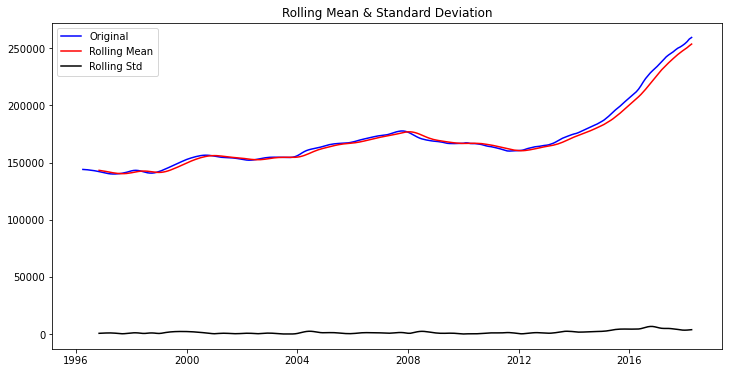

Results of Dickey-Fuller Test: 

Test Statistic                  -0.547681
p-value                          0.882371
#Lags Used                      12.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [73]:
stationarity_check(df_dfw)
# let's try to get that p-value down

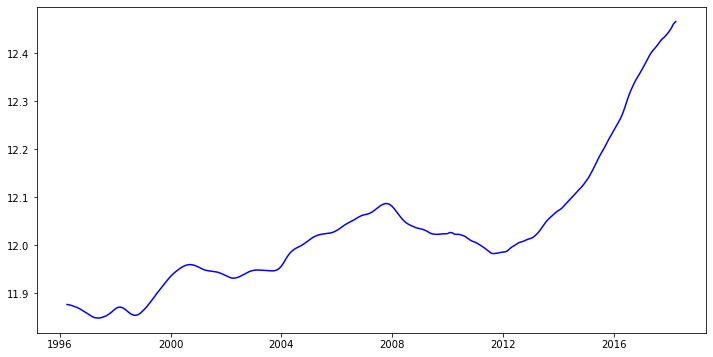

In [74]:
# let's do a log transformation 
df_log_dfw = np.log(df_dfw)
fig = plt.figure(figsize=(12,6))
plt.plot(df_log_dfw, color='blue');

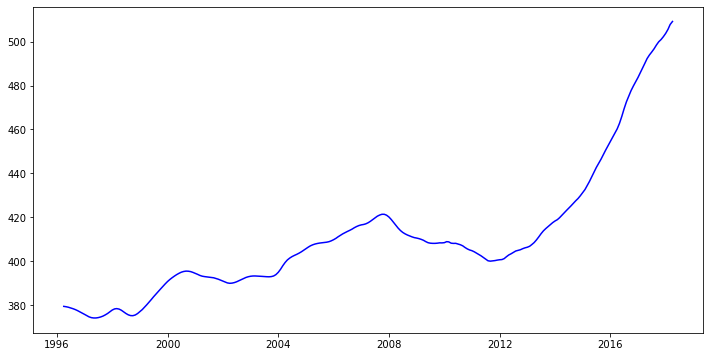

In [75]:
# lets try a sqrt transform 
df_sqrt_dfw = np.sqrt(df_dfw)
fig = plt.figure(figsize=(12,6))
plt.plot(df_sqrt_dfw, color='blue');

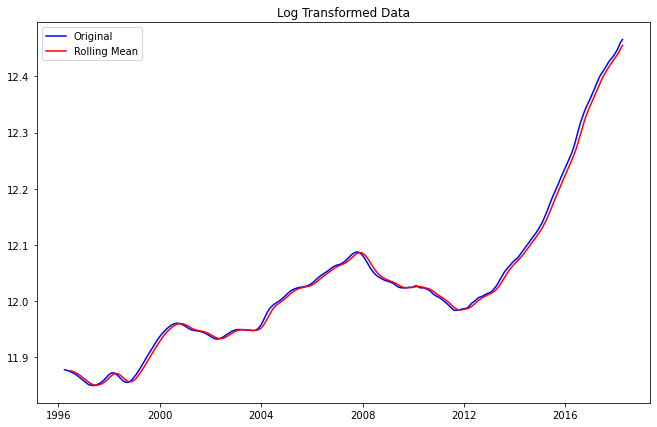

In [76]:
# lets create a log transform so we can substract the rolling mean 
roll_mean_dfw = np.log(df_dfw).rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(df_dfw), color='blue', label='Original')
plt.plot(roll_mean_dfw, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [77]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean_dfw = np.log(df_dfw) - roll_mean_dfw

# Print the first 10 rows
data_minus_roll_mean_dfw.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,-0.002098
1996-08-01,-0.002532
1996-09-01,-0.002969
1996-10-01,-0.003455
1996-11-01,-0.004036
1996-12-01,-0.004399


In [78]:
data_minus_roll_mean_dfw.dropna(inplace=True)

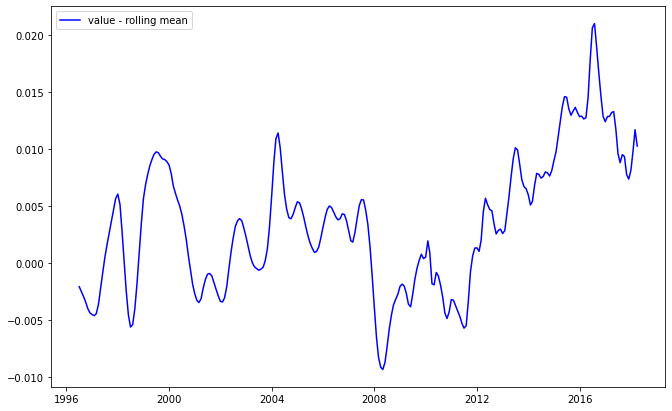

In [79]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean_dfw, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

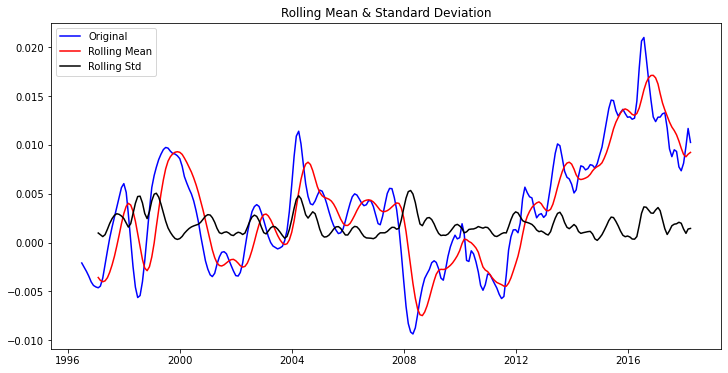

Results of Dickey-Fuller Test: 

Test Statistic                  -2.250465
p-value                          0.188442
#Lags Used                       7.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


In [80]:
stationarity_check(data_minus_roll_mean_dfw)

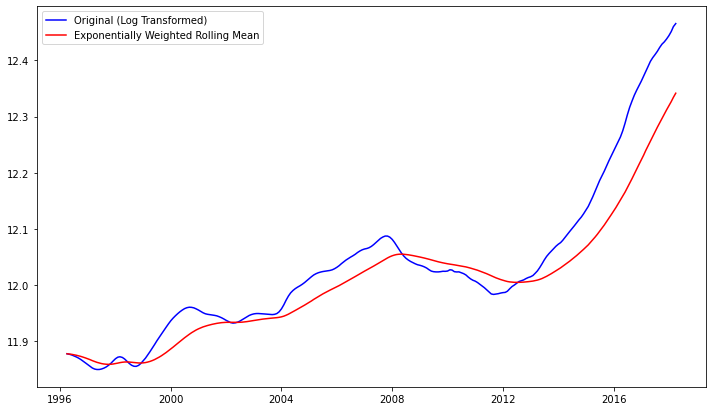

In [81]:
# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean_dfw = np.log(df_dfw).ewm(halflife=12).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_dfw), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean_dfw, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

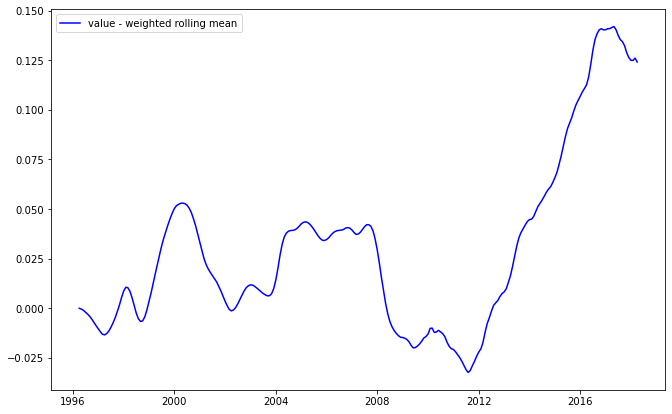

In [82]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean_dfw = np.log(df_dfw) - exp_roll_mean_dfw

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean_dfw, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

# ask clay for thoughts here 

In [ ]:
stationarity_check(data_minus_exp_roll_mean_dfw)
#this p-value is worse!